In [9]:
# standard imports
import pandas as pd
import numpy as np
# import custom netdata stuff from our package
from netdata_api_utils.utils import api, get_metrics

%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## df_allmetrics

In [12]:
#df_allmetrics[df_allmetrics['name'].str.contains('random')]

,name,context,units,last_updated,dimensions


In [10]:
df_allmetrics = pd.DataFrame.from_dict(api(endpoint='allmetrics',options='?format=json'),orient='index')
print(df_allmetrics.shape)
df_allmetrics.sample(10)

(131, 5)


,name,context,units,last_updated,dimensions
netdata.plugin_diskspace,netdata.plugin_diskspace,netdata.plugin_diskspace,milliseconds/s,1568821444,"{'user': {'name': 'user', 'value': 0.0}, 'syst..."
ipv4.packets,ipv4.packets,ipv4.packets,packets/s,1568821444,"{'InReceives': {'name': 'received', 'value': 1..."
netdata.net,netdata.net,netdata.net,kilobits/s,1568821444,"{'in': {'name': 'in', 'value': 0.0}, 'out': {'..."
disk_space._run_lock,disk_space._run_lock,disk.space,GiB,1568821444,"{'avail': {'name': 'avail', 'value': 0.0048828..."
system.io,system.io,system.io,KiB/s,1568821444,"{'in': {'name': 'in', 'value': 0.0}, 'out': {'..."
netdata.plugin_tc_cpu,netdata.plugin_tc_cpu,netdata.plugin_tc_cpu,milliseconds/s,1568821443,"{'user': {'name': 'user', 'value': 0.0}, 'syst..."
system.net,system.net,system.net,kilobits/s,1568821444,"{'InOctets': {'name': 'received', 'value': 38...."
cpu.cpu1_cpuidle,cpu.cpu1_cpuidle,cpuidle.cpuidle,percentage,1568821444,"{'cpu1_active_time': {'name': 'C0 (active)', '..."
disk_avgsz.sda,disk_avgsz.sda,disk.avgsz,KiB/operation,1568821444,"{'reads': {'name': 'reads', 'value': 0.0}, 'wr..."
disk_space._dev_shm,disk_space._dev_shm,disk.space,GiB,1568821444,"{'avail': {'name': 'avail', 'value': 7.3455429..."


## df

In [6]:
n_metrics = 10
mins_lag = 60*4
#metrics_list = np.random.choice(df_allmetrics['name'].unique(),n_metrics,replace=False).tolist()
metrics_list = [metric for metric in df_allmetrics['name'].unique() if 'cpu' in metric]
#metrics_list ['users.cpu']
df = get_metrics(metrics_list,after=-(60*mins_lag),before=0)
print(df['timestamp'].min(),df['timestamp'].max())
print(df.shape)
df.sample(10)

2019-09-18 14:40:00 2019-09-18 15:33:20
(1323, 4)


,timestamp,key,label,value
27,2019-09-18 15:33:20,cpu.cpu1,softirq,0.000000
7,2019-09-18 14:46:40,cpu.cpu1_softnet_stat,processed,0.255470
25,2019-09-18 14:46:40,cpu.cpu2,steal,0.000000
6,2019-09-18 14:53:20,cpu.cpu2_cpuidle,C0 (active),100.000000
34,2019-09-18 14:46:40,cpu.cpu2_interrupts,RES,10.005002
2,2019-09-18 15:20:00,cpu.cpu2_softirqs,TIMER,10.158360
12,2019-09-18 15:13:20,cpu.cpu2_interrupts,virtio1-output.2_30,0.152500
21,2019-09-18 15:13:20,cpu.cpu3_softirqs,SCHED,9.265705
2,2019-09-18 15:20:00,netdata.web_thread4_cpu,user,0.030000
15,2019-09-18 14:53:20,netdata.plugin_proc_cpu,system,0.590000


## Save Data

In [7]:
# save sample of data
df.to_csv('../data/netdata_sample.csv',index=False)

## Plots

/home/andrewm4894/anaconda3/envs/netdata-learn/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


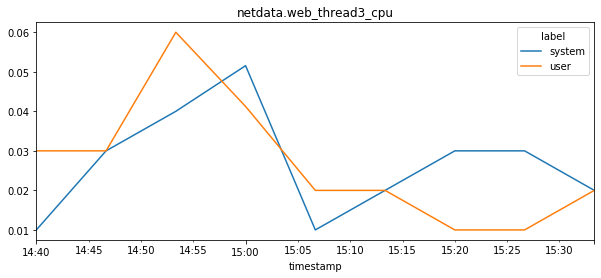

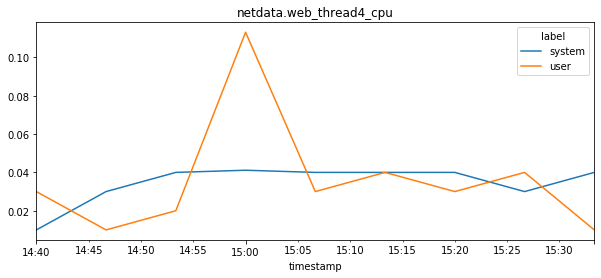

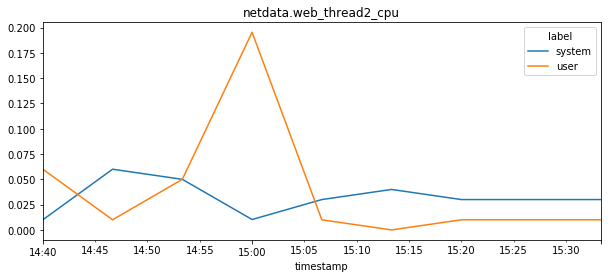

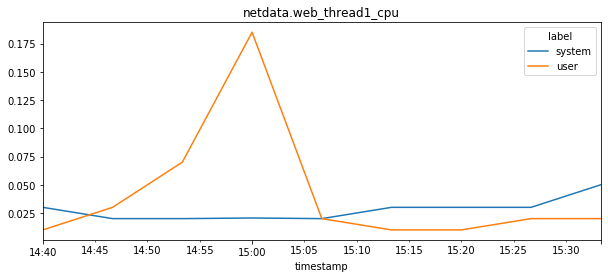

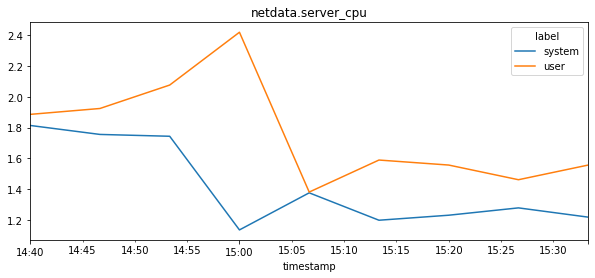

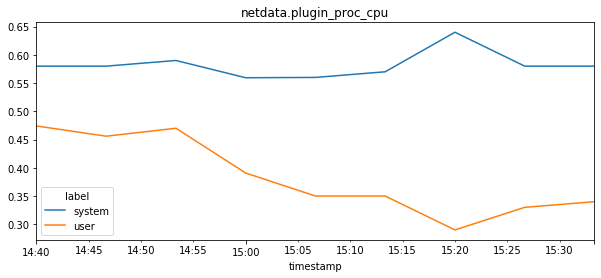

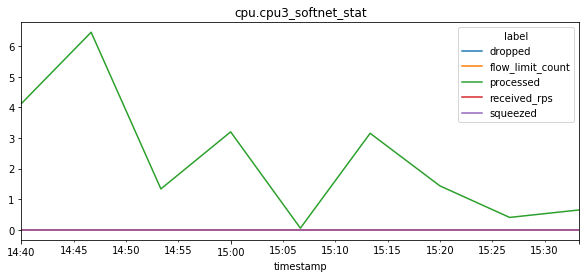

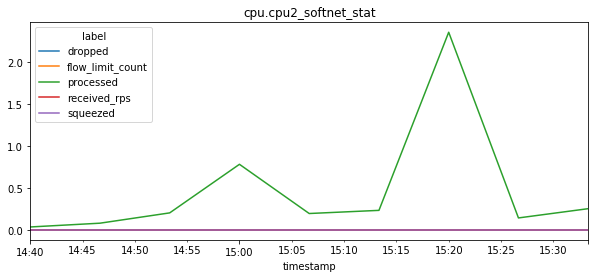

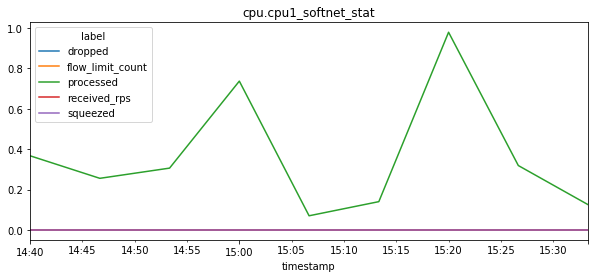

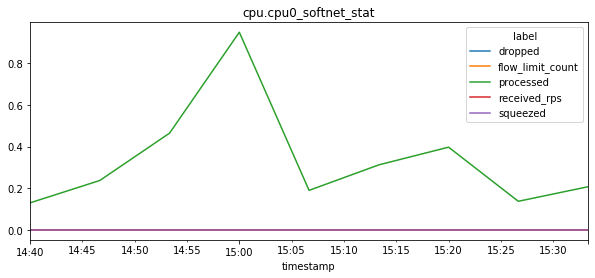

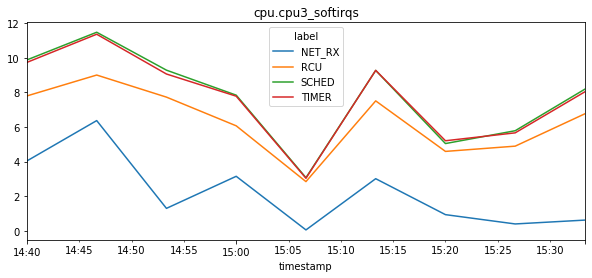

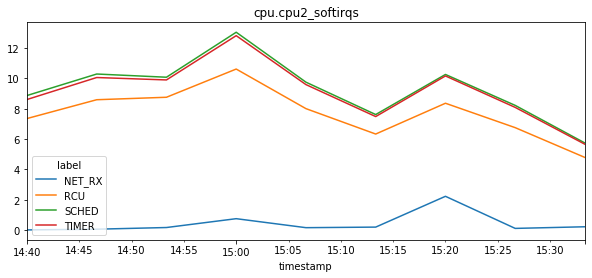

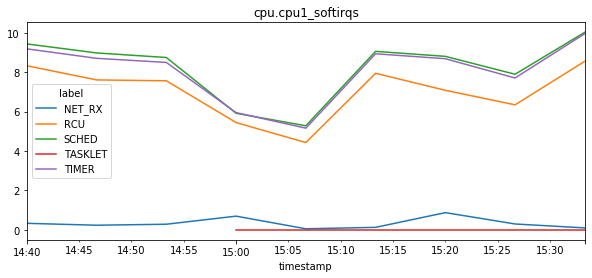

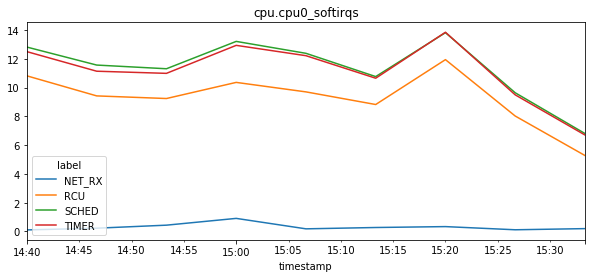

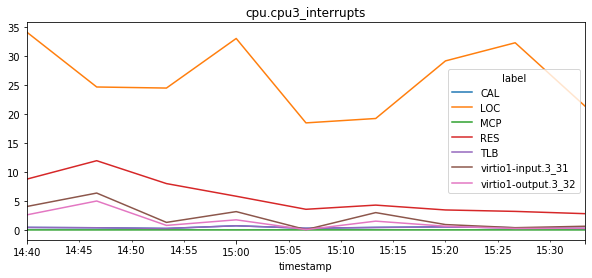

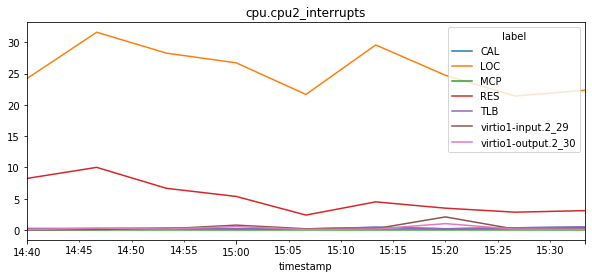

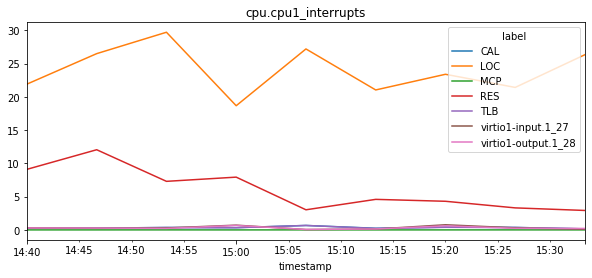

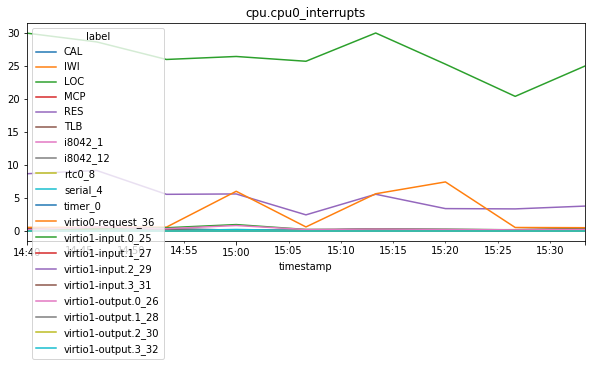

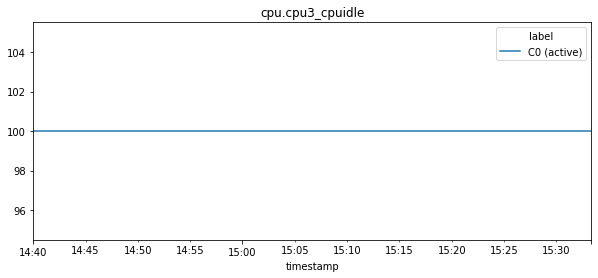

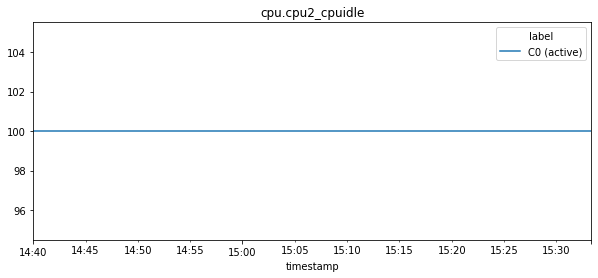

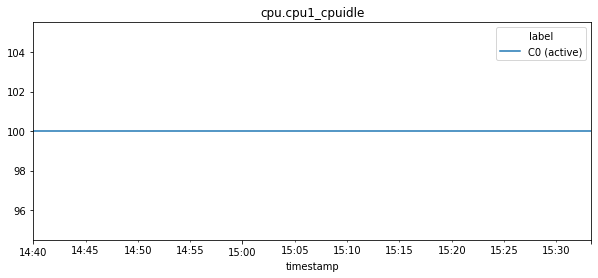

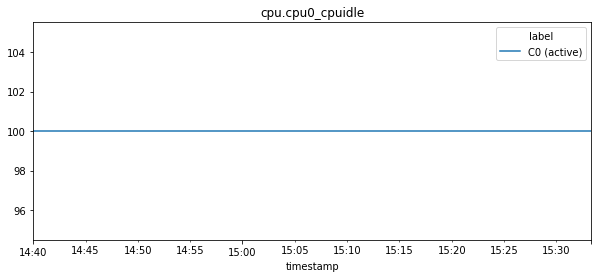

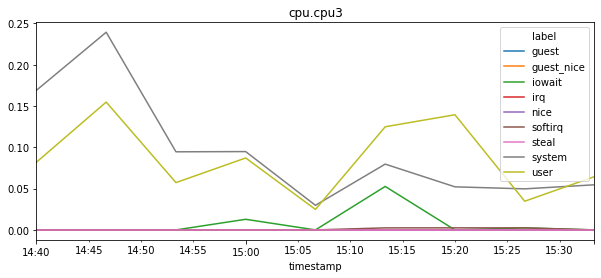

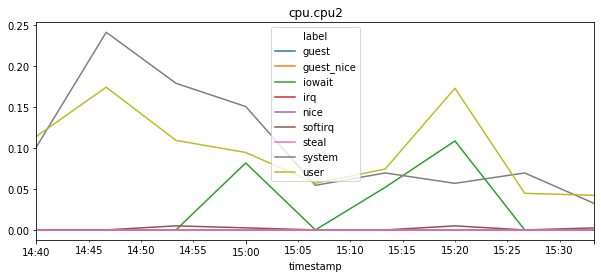

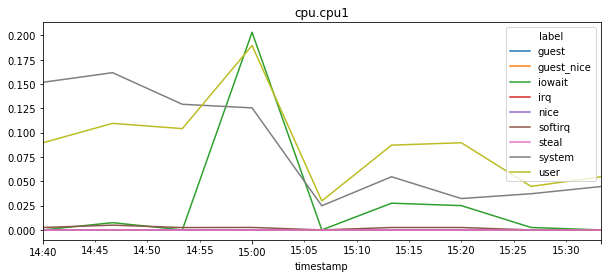

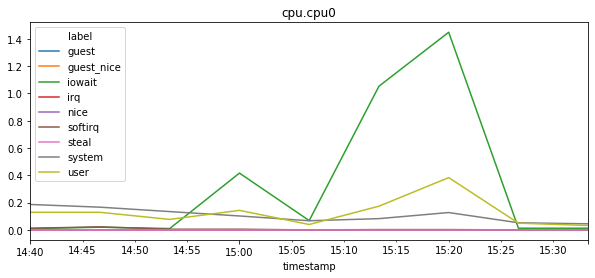

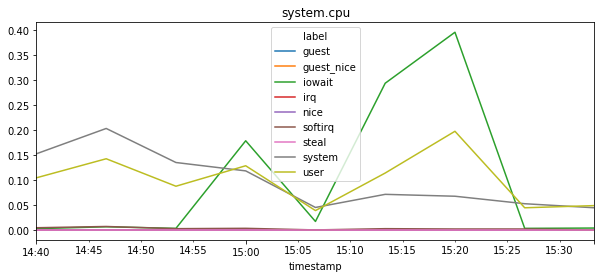

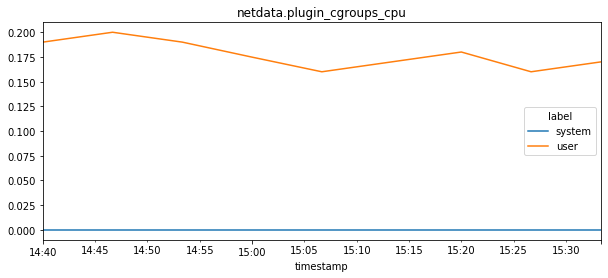

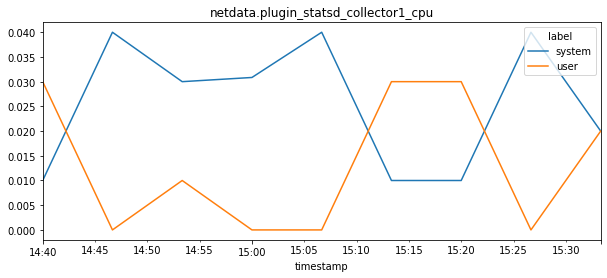

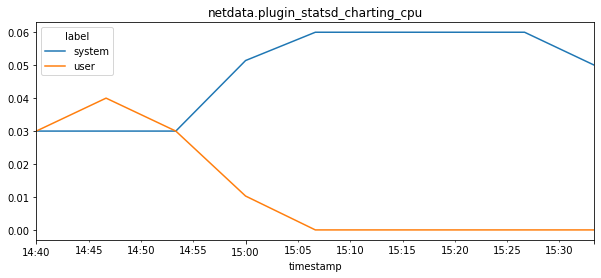

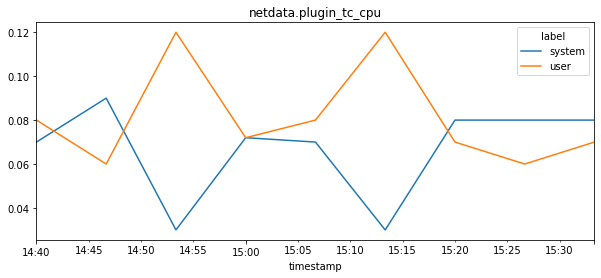

In [8]:
# plots
for metric in metrics_list:
    df[df['key']==metric].pivot(index='timestamp',columns='label',values='value').plot(title=metric, figsize=(10,4))